## Question 3.1

IIR filter design

1. Use matlab to determine the lowest order of all four types of a digital IIR low-pass filter. The indicators are as follows: 40kHz sampling rate, 4kHz passband boundary frequency, 8kHz stopband boundary frequency, 0.5dB passband ripple, and 40dB minimum stopband attenuation. And plot the frequency response of each filter on the same graph. freqz
2. Use matlab to determine the lowest order of all four types of a digital IIR high-pass filter. The indicators are as follows: 3500Hz sampling rate, 1050Hz passband boundary frequency, 600Hz stopband boundary frequency, 1dB passband ripple, and 50dB minimum stopband attenuation. And plot the frequency response of each filter on the same graph.
3. Use matlab to determine the lowest order of all four types of a digital IIR bandpass filter. The specifications are as follows: 7kHz sampling rate, passband boundary frequencies of 1.4kHz and 2.1kHz, stopband boundary frequencies of 1.05kHz and 2.45kHz, passband ripple of 0.4dB, and minimum stopband attenuation of 50dB. And plot the frequency response of each filter on the same graph.
4. Use matlab to determine the lowest order of all four types of a digital IIR bandstop filter. The specifications are as follows: sampling rate of 12kHz, passband boundary frequencies of 2.1kHz and 4.5kHz, stopband boundary frequencies of 2.7kHz and 3.9kHz, passband ripple of 0.6dB, and minimum stopband attenuation of 45dB. And plot the frequency response of each filter on the same graph.

Functions used: butter, buttord, cheb2ord, chebl1, cheby2, ellip, ellipord.

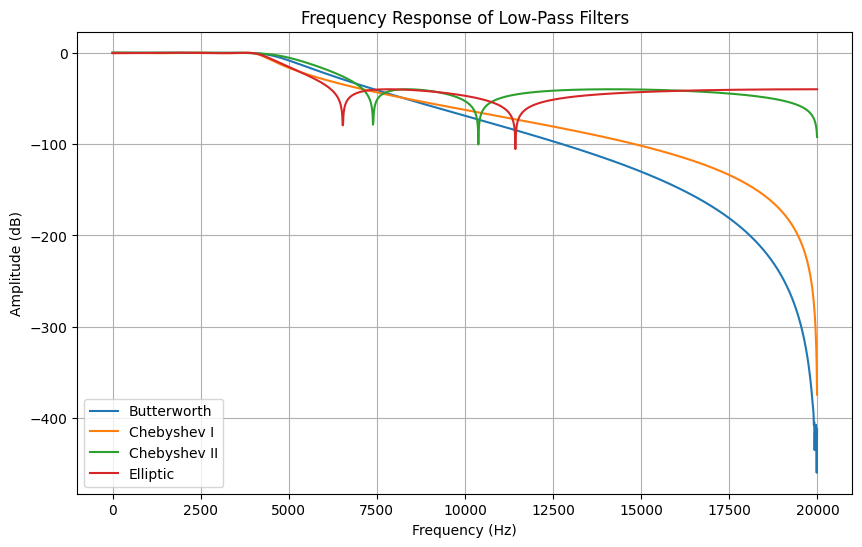

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import buttord, butter, cheb1ord, cheby1, cheb2ord, cheby2, ellipord, ellip, freqz

# Parameters for the low-pass filter
fs = 40000  # sampling frequency in Hz
wp = 4000  # passband frequency in Hz
ws = 8000  # stopband frequency in Hz
gpass = 0.5  # passband ripple in dB
gstop = 40  # stopband attenuation in dB

# Normalized frequencies (divide by Nyquist frequency, which is fs/2)
wp_norm = wp / (fs / 2)
ws_norm = ws / (fs / 2)

# Butterworth filter order and design
b_order, b_wn = buttord(wp_norm, ws_norm, gpass, gstop)
b_b, b_a = butter(b_order, b_wn, btype='low')
w, h_b = freqz(b_b, b_a, worN=2000)

# Chebyshev Type I filter order and design
c1_order, c1_wn = cheb1ord(wp_norm, ws_norm, gpass, gstop)
c1_b, c1_a = cheby1(c1_order, gpass, c1_wn, btype='low')
_, h_c1 = freqz(c1_b, c1_a, worN=2000)

# Chebyshev Type II filter order and design
c2_order, c2_wn = cheb2ord(wp_norm, ws_norm, gpass, gstop)
c2_b, c2_a = cheby2(c2_order, gstop, c2_wn, btype='low')
_, h_c2 = freqz(c2_b, c2_a, worN=2000)

# Elliptic filter order and design
e_order, e_wn = ellipord(wp_norm, ws_norm, gpass, gstop)
e_b, e_a = ellip(e_order, gpass, gstop, e_wn, btype='low')
_, h_e = freqz(e_b, e_a, worN=2000)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(w / np.pi * (fs / 2), 20 * np.log10(abs(h_b)), label='Butterworth')
plt.plot(w / np.pi * (fs / 2), 20 * np.log10(abs(h_c1)), label='Chebyshev I')
plt.plot(w / np.pi * (fs / 2), 20 * np.log10(abs(h_c2)), label='Chebyshev II')
plt.plot(w / np.pi * (fs / 2), 20 * np.log10(abs(h_e)), label='Elliptic')
plt.title('Frequency Response of Low-Pass Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)
plt.show()

## Question 3.2

Use rectangular window, Blackman window, Hamming window, Hanning window and Bartlett window to design a linear phase FIR low-pass filter with a cutoff frequency of $0.3 \pi$ and a window length of M (M=11, 41, 81, 121). Draw this in the diagram:

1. Impulse response of ideal low-pass filter;
2. The added window function;
3. Filter impulse response after adding window
4. Amplitude frequency and phase frequency characteristics of the filter;
5. Compare the filter characteristics corresponding to different lengths based on the results;
6. Compare the corresponding effects of different windows.

Function used: fir1

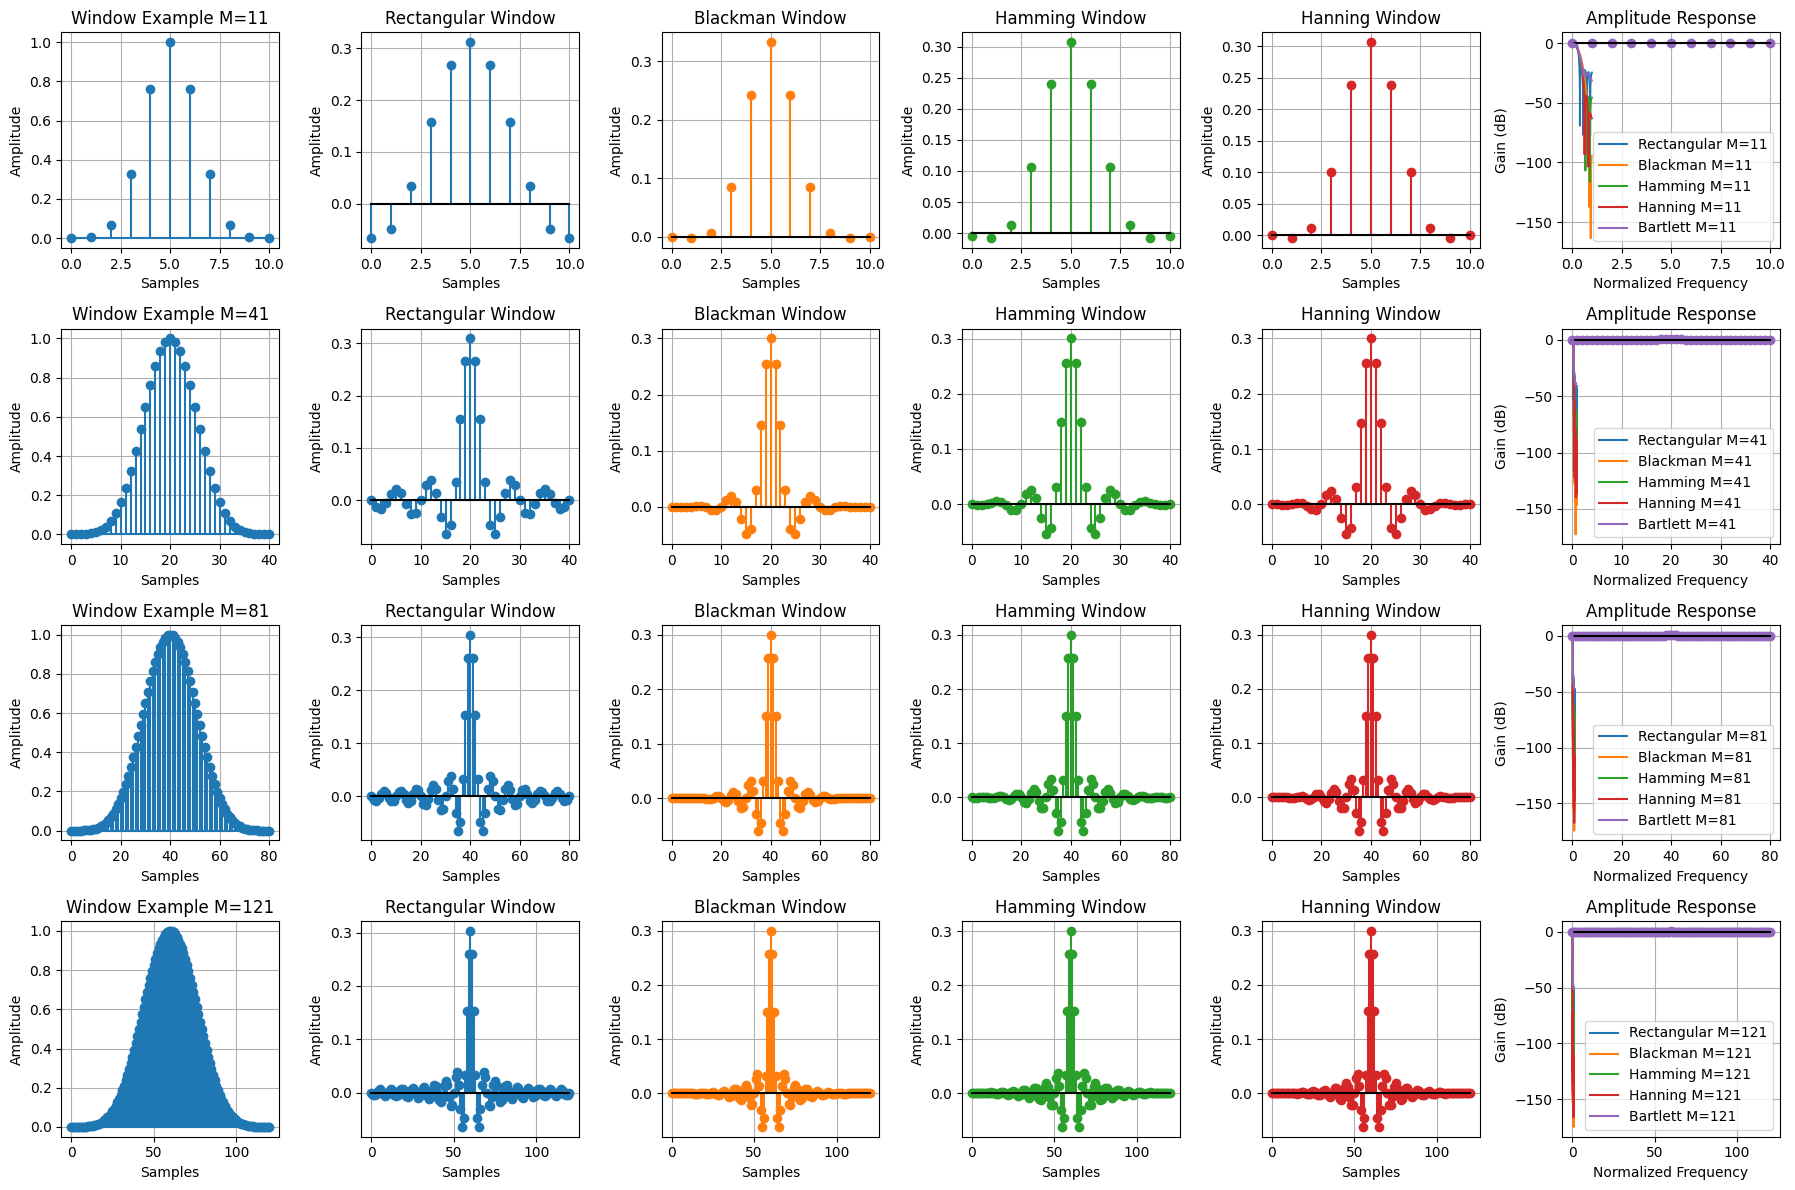

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Parameters
M_values = [11, 41, 81, 121]  # Different lengths of the filter
cutoff = 0.3  # Normalized cutoff frequency (0.3 * pi)
window_types = ['boxcar', 'blackman', 'hamming', 'hann', 'bartlett']
window_labels = ['Rectangular', 'Blackman', 'Hamming', 'Hanning', 'Bartlett']

# Frequency axis for plotting
freq = np.linspace(0, 1, 1024)

plt.figure(figsize=(18, 12))

for i, M in enumerate(M_values):
    plt.subplot(len(M_values), 6, i*6 + 1)
    for j, window in enumerate(window_types):
        # Design FIR filter
        b = firwin(M, cutoff, window=window)
        # Frequency response
        w, h = freqz(b, worN=2048)
        # Normalized frequency for plotting
        w = w / np.pi

        # Plot impulse response of the window
        if j == 0:
            win = np.kaiser(M, beta=14)  # Example window function for visualizing a window
            plt.stem(win, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
            plt.title(f'Window Example M={M}')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.grid(True)

        # Plot combined impulse response
        plt.subplot(len(M_values), 6, i*6 + j + 2)
        plt.stem(b, linefmt=f'C{j}-', markerfmt=f'C{j}o', basefmt='k-')
        plt.title(f'{window_labels[j]} Window')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.grid(True)

        # Plot amplitude and phase response
        plt.subplot(len(M_values), 6, i*6 + 6)
        plt.plot(w, 20 * np.log10(np.abs(h)), label=f'{window_labels[j]} M={M}')
        plt.title('Amplitude Response')
        plt.xlabel('Normalized Frequency')
        plt.ylabel('Gain (dB)')
        plt.grid(True)
        plt.legend()

plt.tight_layout()
plt.show()

## Question 3.3

IIR filter implementation structure

$$H(z)=\frac{3+8 z^{-1}+12 z^{-2}+7 z^{-3}+2 z^{-4}-2 z^{-5}}{16+24 z^{-1}+24 z^{-2}+14 z^{-3}+5 z^{-4}+z^{-5}}$$

1. Implement the system in cascade form and draw the implementation block diagram.
2. Implement the system in parallel form and draw the implementation block diagram.

Functions used: tf2zp, residue, residuez

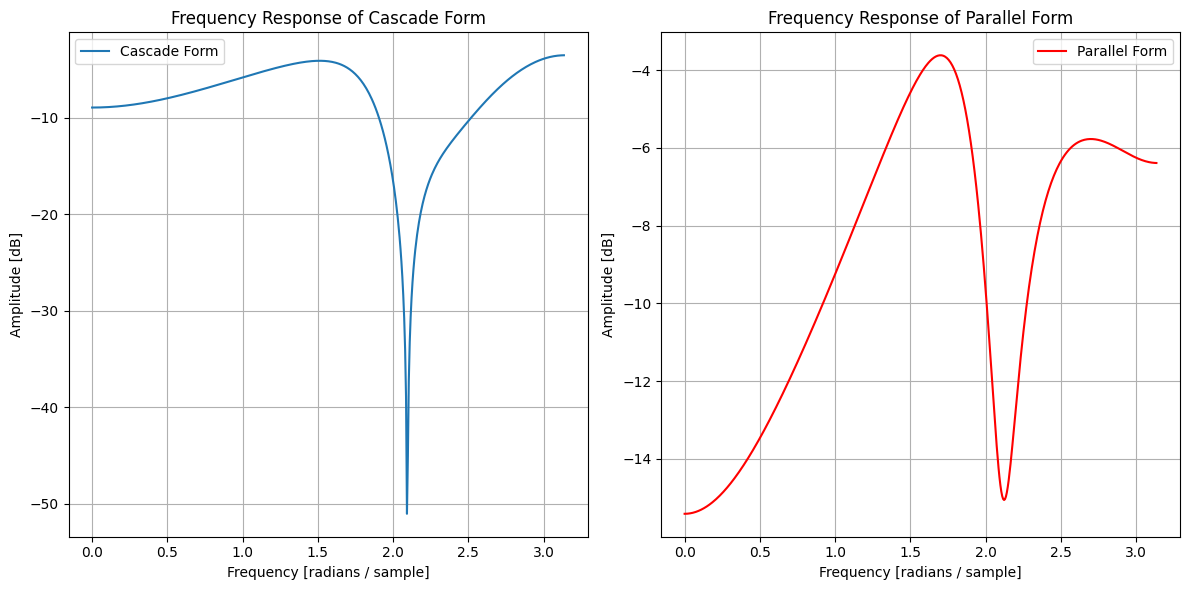

Second-Order Sections (SOS):
 [[ 0.1875      0.375       0.375       1.          0.5         0.        ]
 [ 1.         -0.33333333  0.          1.          0.5         0.25      ]
 [ 1.          1.          1.          1.          0.5         0.5       ]]
Residues: [-1.171875 +0.j          1.       +0.77581442j  1.       -0.77581442j
 -0.3046875-0.43406857j -0.3046875+0.43406857j]
Poles: [-0.5 +0.j         -0.25+0.4330127j  -0.25-0.4330127j  -0.25+0.66143783j
 -0.25-0.66143783j]
Direct Terms: [0.1875]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2sos, sosfreqz, residue, freqz

# Define the numerator (b) and the denominator (a) of the transfer function H(z)
b = [3, 8, 12, 7, 2, -2]
a = [16, 24, 24, 14, 5, 1]

# Convert transfer function to second-order sections for cascade form
sos = tf2sos(b, a)

# Compute the partial fraction expansion for parallel form
r, p, k = residue(b, a)

# Frequency response for cascade form
w_sos, h_sos = sosfreqz(sos)

# Frequency response for parallel form
# Generate frequency array
w, _ = freqz(b, a)
# Compute response using the inverse z-transform of each partial fraction
h_parallel = np.zeros_like(w, dtype=complex)
for i in range(len(r)):
    h_parallel += r[i] / (1 - p[i] * np.exp(-1j * w))

# Plot the frequency responses
plt.figure(figsize=(12, 6))

# Plot for cascade form
plt.subplot(1, 2, 1)
plt.plot(w_sos, 20 * np.log10(np.abs(h_sos)), label='Cascade Form')
plt.title('Frequency Response of Cascade Form')
plt.xlabel('Frequency [radians / sample]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.legend()

# Plot for parallel form
plt.subplot(1, 2, 2)
plt.plot(w, 20 * np.log10(np.abs(h_parallel)), label='Parallel Form', color='red')
plt.title('Frequency Response of Parallel Form')
plt.xlabel('Frequency [radians / sample]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Display the coefficients and parameters
print("Second-Order Sections (SOS):\n", sos)
print("Residues:", r)
print("Poles:", p)
print("Direct Terms:", k)